<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/Task_0618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [18]:
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [36]:
df_auto = pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

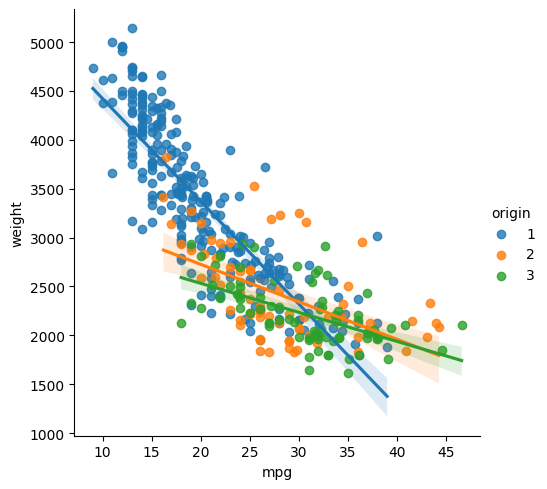

In [38]:
# 선형관계1
sns.lmplot(x="mpg", y="weight", hue="origin", data=df_auto)

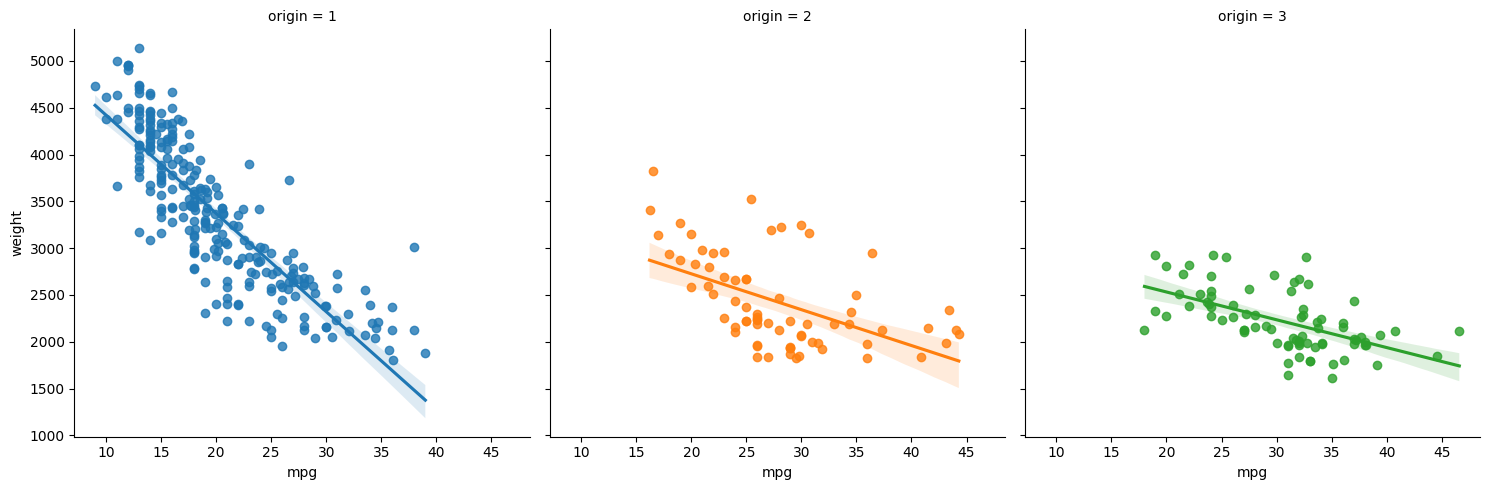

In [40]:
# 선형관계2
sns.lmplot(x="mpg", y="weight", hue="origin", col="origin", data=df_auto)

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상를 사용.

In [5]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


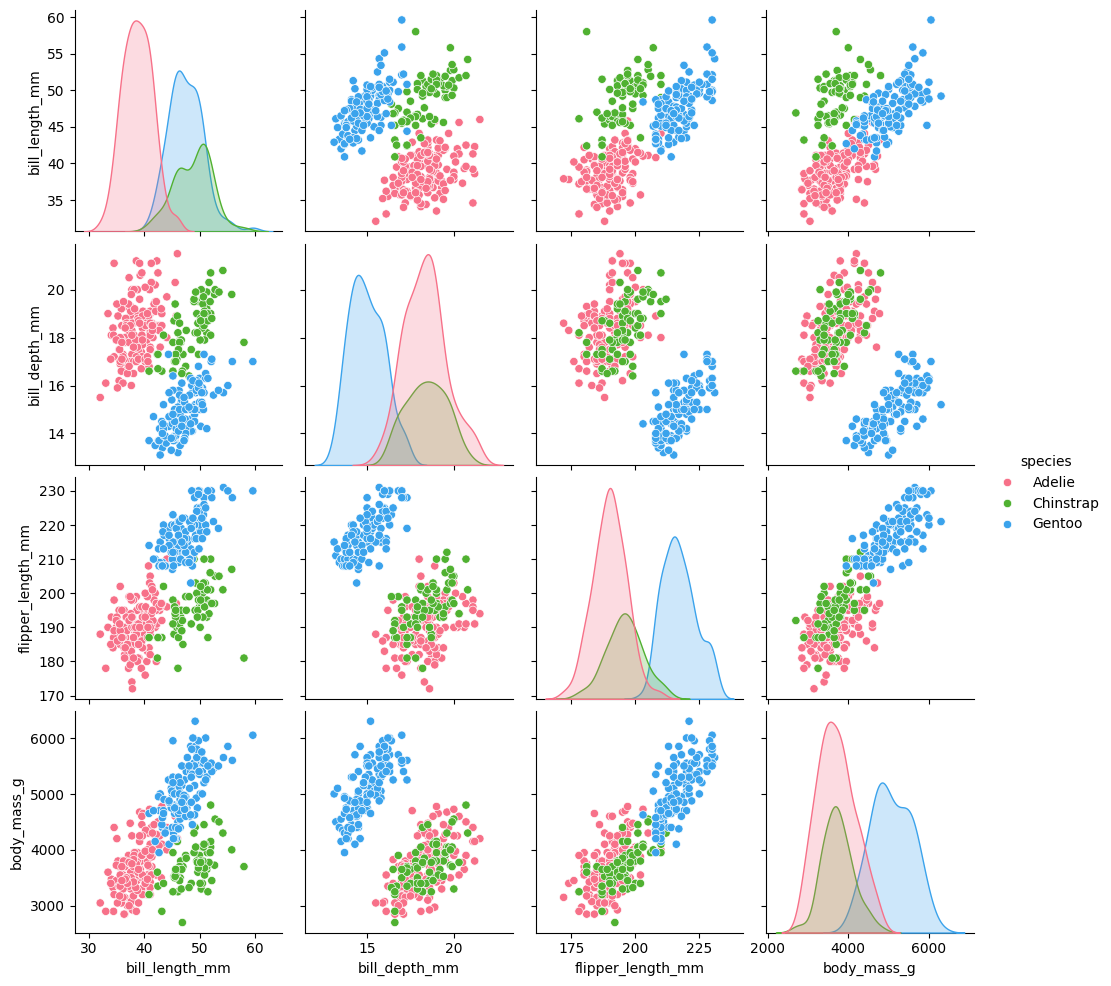

In [7]:
# pairplot 생성하기 (종류별 색상 지정)
sns.pairplot(
    df_pg, hue="species", palette="husl",  # 종류별 색상 지정
)

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

Text(0, 0.5, 'count')

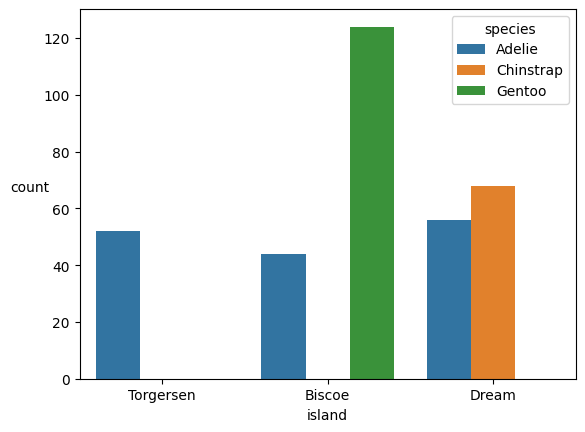

In [10]:
# 섬별 개체 수 카운트 플롯 생성
sns.countplot(
    x = "island",
    hue = "species",
    data = df_pg
)
plt.ylabel("count",labelpad=10,rotation=0)

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [41]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(50.722222222222214, 0.5, 'pclass')

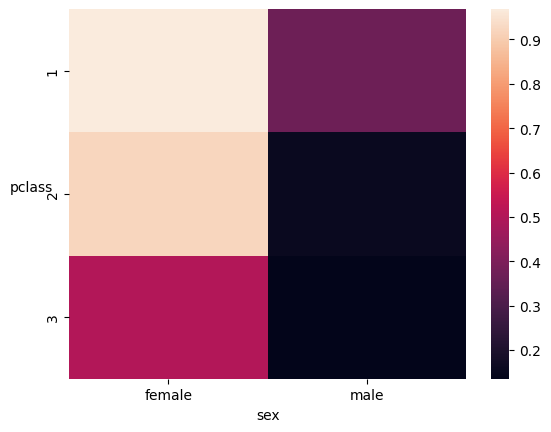

In [46]:
# titanic에서 sex와 pclass간의 생존률 히트맵
sns.heatmap(
    df_titanic.pivot_table(index='pclass', columns='sex', values='survived', aggfunc='mean')
)
plt.ylabel("pclass",labelpad=10,rotation=0)

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

<ipython-input-52-6c135fefb126>:8: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(handles=[tbp, tvp])


Text(0, 0.5, 'age')

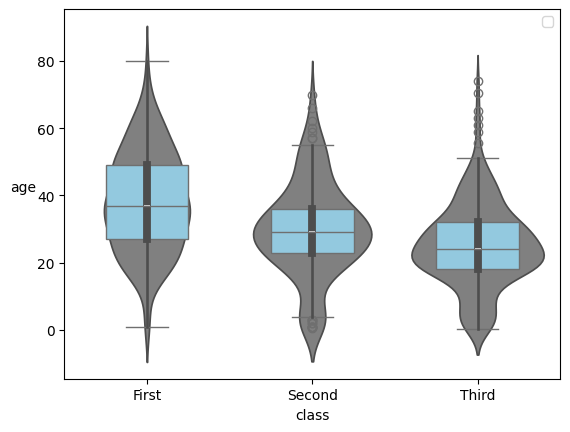

In [52]:
# 등급에 따른 탑승객나이 박스플롯
tbp = sns.boxplot(x="class", y="age", data=df_titanic, color='skyblue', width=0.8)

# 등급에 따른 탑승객나이 바이올린플롯
tvp = sns.violinplot(x="class", y="age", data=df_titanic, color='gray')

# 나란히 생성
plt.legend(handles=[tbp, tvp])
plt.ylabel("age",labelpad=10,rotation=0)

Task6_0618. 주어진 HTML 문서에서 모든 $<a>$ 태그를 추출하세요.

In [57]:
from bs4 import BeautifulSoup
import requests

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
</body></html>
"""

In [9]:
# 주어진 html 문서에서 <a>태그 추출
a_tags = soup.find_all('a')
print(a_tags)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


Task7_0618. 주어진 HTML 문서에서 첫 번째 $<p>$ 태그의 텍스트를 추출하세요.

In [59]:
p_tags = soup.find_all('p')
print(p_tags)
print(p_tags[0].text)

[<p class="title"><b>The Dormouse's story</b></p>]
The Dormouse's story


Task8_0618. 주어진 HTML 문서에서 모든 링크의 URL을 추출하세요.

In [19]:
links = soup.find_all('a')
for link in links:
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


Task9_0618. 주어진 HTML 문서에서 클래스가 sister인 모든 태그를 추출하세요.

In [22]:
# class가 sister인 모든 태그 추출
sister_tags = soup.find_all(class_='sister')
print(sister_tags)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [23]:
for tag in sister_tags:
    print(tag.text)

Elsie
Lacie
Tillie


Task10_0618. 주어진 HTML 문서에서 ID가 link1인 태그를 추출하세요

In [25]:
# ID가 link1인 테그
li1t = soup.find(id='link1')
print(li1t)
print(li1t.text)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
Elsie


Task11_0618. 주어진 HTML 문서에서 모든 텍스트를 추출하세요.

In [60]:
# 모든 텍스트 추출
all_text = soup.get_text()
print(all_text)


The Dormouse's story

The Dormouse's story
Elsie
Lacie
Tillie




Task12_0618. 주어진 HTML 문서에서 href 속성이 http://example.com/lacie인 태그를 추출하세요.

In [30]:
# links = soup.find_all('a')
# for link in links:
#     if link.get('href') == 'http://example.com/lacie':
#         print(link)
#         print(link.text)

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
Lacie


In [62]:
links = soup.find_all(href='http://example.com/lacie')
print(li1t)
print(li1t.text)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
Elsie


Task13_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 부모 태그를 추출하세요.

In [63]:
# link1 부모 태그 추출
li1_pa = li1t.parent
print(li1_pa)

<body>
<p class="title"><b>The Dormouse's story</b></p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
</body>


Task14_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 다음 형제 태그를 추출하세요.

In [64]:
# link1 형제 태그 추출
li1_next = li1t.next_sibling
print(li1_next)

Task15_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 href 속성 값을 추출하세요.

In [34]:
# ID가 link1인 태그의 href 속성 값을 추출
li1_href = li1t.get('href')
print(li1_href)

http://example.com/elsie
